In [432]:
# magic command to display matplotlib plots inline within the ipython notebook
%matplotlib inline

# import necessary modules
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 8

### Spatial objects: Overview of Shapely

Shapely is a python library for geometric operations. Shapely can create spatial objects and manipulate with them. First, let's import the library:

In [197]:
from shapely.geometry import Point, LineString, Polygon

#### Points

In [198]:
moscow_lon = 37.618423
moscow_lat = 55.751244
point = Point(moscow_lon, moscow_lat)

A Point has zero area and zero length.

In [199]:
print("area ", point.area)
print("length ", point.length)

area  0.0
length  0.0


Its x-y bounding box is a (minx, miny, maxx, maxy) tuple.

In [200]:
point.bounds

(37.618423, 55.751244, 37.618423, 55.751244)

Coordinate values are accessed via coords, x, y, and z properties.

In [201]:
list(point.coords)

[(37.618423, 55.751244)]

In [202]:
point.x

37.618423

In [203]:
point.y

55.751244

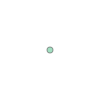

In [204]:
point

#### Lines

In [225]:
#Moscow Piter
hse_lon = 37.608523
hse_lat = 55.721317

strelka_lon = 37.609529
strelka_lat = 55.742412

line = LineString([(hse_lon, hse_lat), (strelka_lon, strelka_lat)])

In [226]:
line.area

0.0

In [227]:
line.length

0.02111897395708689

Its x-y bounding box is a (minx, miny, maxx, maxy) tuple.

In [228]:
line.bounds

(37.608523, 55.721317, 37.609529, 55.742412)

The defining coordinate values are accessed via the coords property.

In [229]:
list(line.coords)

[(37.608523, 55.721317), (37.609529, 55.742412)]

Coordinates may also be sliced.

In [230]:
line.coords[1:]

[(37.609529, 55.742412)]

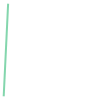

In [231]:
line

#### Polygons

A Polygon has non-zero area and non-zero length.

In [218]:
#Moscow bbox

polygon = Polygon([(37.3193289,55.489927), (37.9456611,55.489927),(37.9456611,56.009657),
                   (37.3193289,56.009657)])
print(polygon.area)
print(polygon.length)

0.32552363430599734
2.2921243999999916


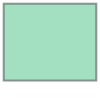

In [219]:
polygon

Its x-y bounding box is a (minx, miny, maxx, maxy) tuple.

In [220]:
polygon.bounds

(37.3193289, 55.489927, 37.9456611, 56.009657)

Component rings are accessed via exterior and interiors properties.

In [221]:
list(polygon.exterior.coords)

[(37.3193289, 55.489927),
 (37.9456611, 55.489927),
 (37.9456611, 56.009657),
 (37.3193289, 56.009657),
 (37.3193289, 55.489927)]

In [222]:
list(polygon.interiors)

[]

### Geometric manipulations

#### Contains

Now that you have a polygon, determining whether a point is inside it is very easy. Just use the method contains() and pass the point as an argument. 

In [224]:
polygon.contains(Point(moscow_lon, moscow_lat))

True

Shapely allows to construct buffers around the objects

In [255]:
line = LineString([(hse_lon, hse_lat), (strelka_lon, strelka_lat)])
dilated = line.buffer(0.006)
eroded = dilated.buffer(-0.003)

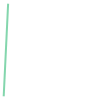

In [256]:
line

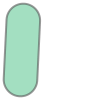

In [257]:
dilated

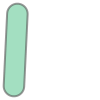

In [258]:
eroded

#### Intersection

In [299]:
a = Point(0, 0).buffer(1.)
b = Point(1, 1).buffer(0.7)

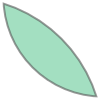

In [300]:
a.intersection(b)

#### Union

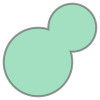

In [301]:
a.union(b)

#### Difference

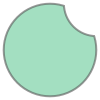

In [302]:
a.difference(b)

### Extra Bonus exercise

Construct buffer of 10 around the point defined in the first exercise and get the area

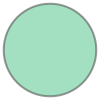

In [42]:
circle.buffer(10)

In [43]:
circle.buffer(10).area

313.6548490545939

### Part 2: Overview of Geopandas Using Open NYC 311 Requests



### GeoSeries: The geometry building block
Like a Pandas Series, a GeoSeries is the building block for the more broadly useful and powerful GeoDataFrame that we’ll focus on in this tutorial. Here we’ll take a bit of time to examine a GeoSeries.

A GeoSeries is made up of an index and a GeoPandas geometry data type. This data type is a shapely.geometry object, and therefore inherits their attributes and methods such as area, bounds, distance, etc.

GeoPandas has six classes of geometric objects, corresponding to the three basic single-entity geometric types and their associated homogeneous collections of multiples entities:

Single entity (core, basic types):
Point
Line (formally known as a LineString)
Polygon
Homogeneous entity collections:
Multi-Point
Multi-Line (MultiLineString)
Multi-Polygon
A GeoSeries is then a list of geometry objects and their associated index values.

#### Create a GeoSeries from a list of shapely Point objects
Then enhance it with a crs and plot it.

In [44]:
gs = gpd.GeoSeries([Point(-120, 45), Point(-121.2, 46), Point(-122.9, 47.5)])
gs

0        POINT (-120 45)
1      POINT (-121.2 46)
2    POINT (-122.9 47.5)
dtype: object

In [45]:
type(gs), len(gs)

(geopandas.geoseries.GeoSeries, 3)

A GeoSeries (and a GeoDataframe) can store a CRS implicitly associated with the geometry column. This is useful as essential spatial metadata and for transformation (reprojection) to another CRS.

In [46]:
gs.crs = {'init': 'epsg:4326'}

The plot method accepts standard matplotlib.pyplot style options, and can be tweaked like any other matplotlib figure.

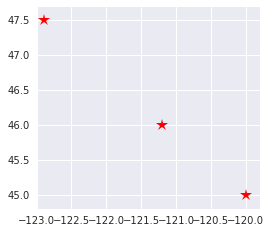

In [47]:
gs.plot(marker='*', color='red', markersize=12, figsize=(4, 4))
plt.xlim([-123, -119.8])
plt.ylim([44.8, 47.7]);

## Creating a GeoDataFrame using GeoPandas

A GeoDataFrame is a tabular data structure that contains a **GeoSeries**.

The most important property of a GeoDataFrame is that it always has one GeoSeries column that holds a special status. This GeoSeries is referred to as the GeoDataFrame‘s **geometry**. When a spatial method is applied to a GeoDataFrame (or a spatial attribute like area is called), this commands will always act on the **geometry** column.

The **geometry** column – no matter its name – can be accessed through the geometry attribute (gdf.geometry), and the name of the geometry column can be found by typing gdf.geometry.name.

A GeoDataFrame may also contain other columns with geometrical (shapely) objects, but only one column can be the active geometry at a time. To change which column is the active geometry column, use the set_geometry method.

Geopandas can read almost any vector-based spatial data format including ESRI shapefile, GeoJSON files and more using the command:

OK, let's jump in and begin loading some New York data.  We will start with 2010 census blocks.

In [354]:
census_blocks = gpd.read_file('data_nyc.geojson')
census_blocks['poly_id'] = 

In [370]:
census_blocks = census_blocks.reset_index()

In [355]:
census_blocks.head()

,Borough,Population_2000,Population_2010,Population_change,Population_change_number,boro_code,boro_name,county_fips,geometry,ntacode,ntaname,shape_area,shape_leng
0,Brooklyn,101055.0,106357.0,5.2,5302.0,3,Brooklyn,047,(POLYGON ((-73.97604935657381 40.6312759056467...,BK88,Borough Park,54005019.0709,39247.2280277
1,Queens,26516.0,26982.0,1.8,466.0,4,Queens,081,(POLYGON ((-73.79493246233996 40.7577980300745...,QN52,East Flushing,29454380.0175,25843.3649343
2,Queens,20201.0,19996.0,-1,-205.0,4,Queens,081,"(POLYGON ((-73.77573836927098 40.743325647164,...",QN48,Auburndale,34164217.6495,32446.8787636
3,Queens,53009.0,51739.0,-2.4,-1270.0,4,Queens,081,(POLYGON ((-73.80379022888246 40.7756101117924...,QN51,Murray Hill,52488277.2938,33266.9047321
4,Queens,21183.0,23150.0,9.3,1967.0,4,Queens,081,(POLYGON ((-73.86109724335759 40.7636644770869...,QN27,East Elmhurst,19726845.7102,19816.7121163


#### Writing Spatial Data

GeoDataFrames can be exported to many different standard formats using the GeoDataFrame.to_file() method.

In [351]:
census_blocks.to_file('census_nyc.geojson')

### Dealing With Coordinate Reference Systems (CRS)

CRS are important because the geometric shapes in a GeoSeries or GeoDataFrame object are simply a collection of coordinates in an arbitrary space. A CRS tells Python how those coordinates related to places on the Earth.

With geospatial data, you have to be aware of the coordinate system the data is stored in.  Latitude - Longitude is in spherical coordinates, from -180 to 180 Longitude, and -180 to 180 Latitude.  For most purposes that require working with more localized data at an urban scale, spatial datasets are generally projected on to a coordinate system that is appropriate for measurements on a flat surface.

Geopandas let's you easily find out the crs of a dataset, and change it to another (project the dataset) as needed.

#### Setting a Projection

Setting a projection may be necessary when for some reason geopandas has coordinate data (x-y values), but no information about how those coordinates refer to locations in the real world. **Most of the time** you don’t have to set a projection. Data loaded from a reputable source (using the from_file() command) should always include projection information. You can see an objects current CRS through the crs attribute:

In [90]:
census_blocks.crs

{'init': 'epsg:4326'}

#### Re-Projecting

Re-projecting is the process of changing the representation of locations from one coordinate system to another. The projection that is best for your application may be different from the projection associated with the data you import. In these cases, data can be re-projected using the to_crs command:

In [357]:
nyc = gpd.read_file('data_nyc.geojson')

In [358]:
nyc.crs

{'init': 'epsg:4326'}

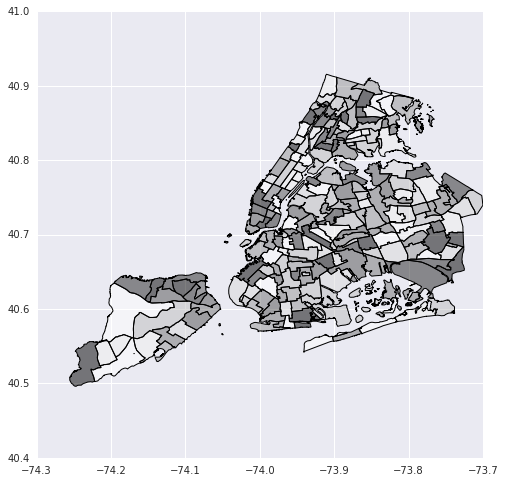

In [103]:
nyc.plot();

In [104]:
nyc = nyc.to_crs({'init': 'epsg:3395'})

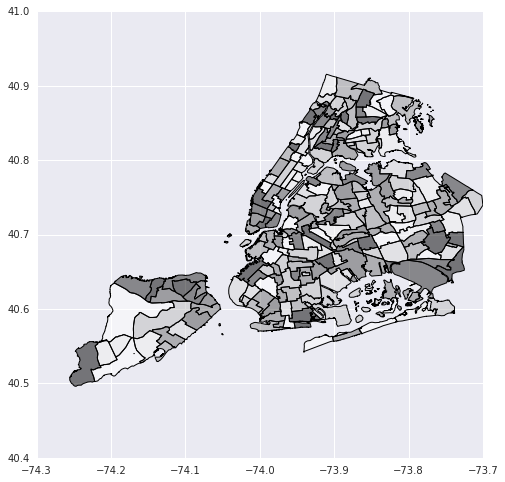

In [433]:
nyc.plot();

### Making Maps

Mapping shapes is as easy as using the plot() method on a GeoSeries or GeoDataFrame.
We can now plot those GeoDataFrames:

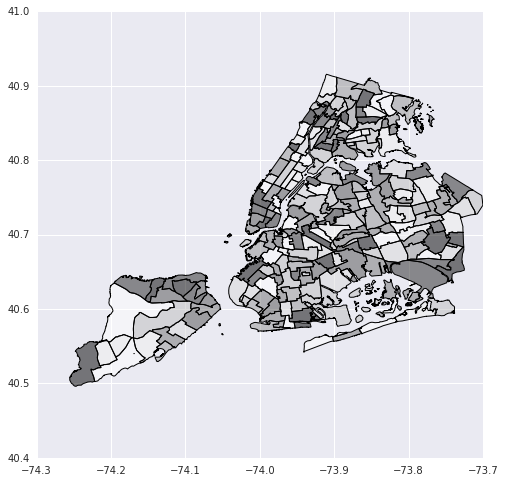

In [51]:
census_blocks.plot();

Note the style options can be passed to the plot() method.

#### Chloropleth Maps
geopandas makes it easy to create Chloropleth maps (maps where the color of each shape is based on the value of an associated variable). Simply use the plot command with the column argument set to the column whose values you want used to assign colors.

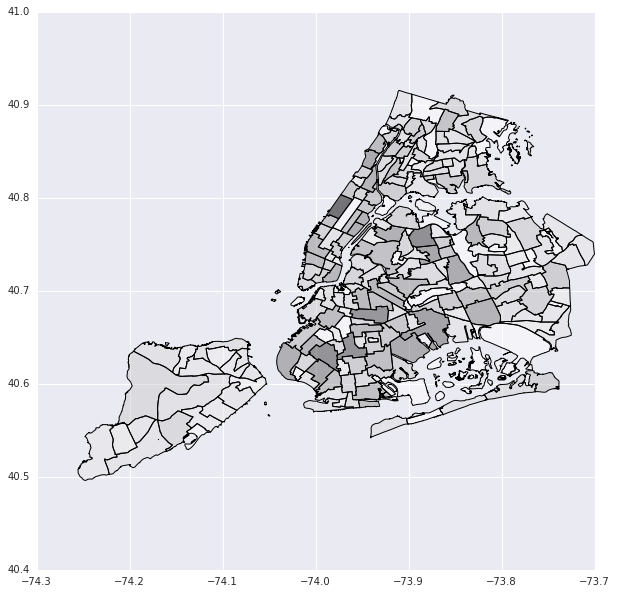

In [359]:
census_blocks.plot('Population_2010', figsize=(12,10));

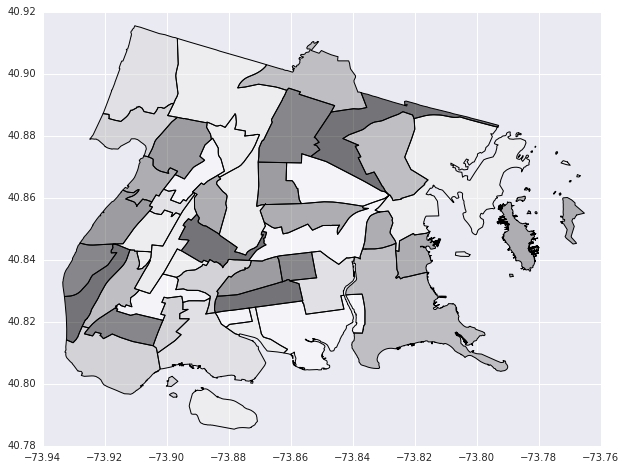

In [360]:
census_blocks[census_blocks['Borough'] == 'Bronx'].plot();

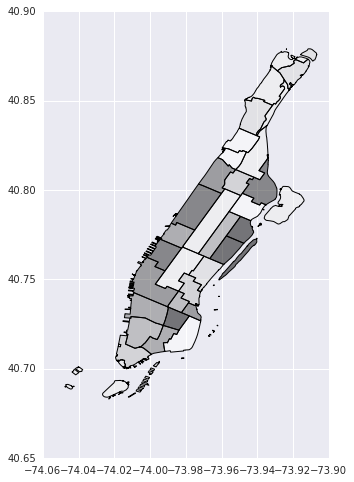

In [361]:
census_blocks[census_blocks['Borough'] == 'Manhattan'].plot();

#### Choosing colors

One can also modify the colors used by plot with the cmap option (for a full list of colormaps, see the matplotlib website):

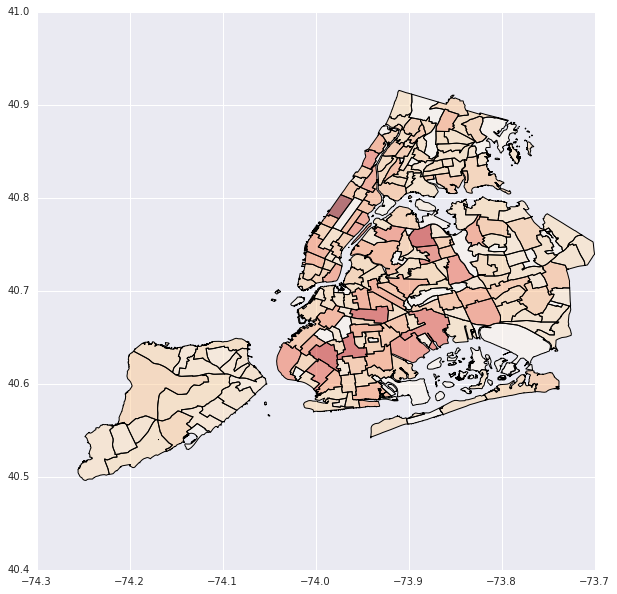

In [362]:
census_blocks.plot('Population_2010', cmap='OrRd', figsize=(12,10));

### Loading 311 Cases as Point Data

Let's load 311 data , droppin rows that have missing data (a good fraction of the data seem to be missing latitude and longitude)

In [667]:
complaints = pd.read_csv('../l1/nyc_complaints_data_inclass.csv')
complaints = complaints.dropna(subset=['Latitude', 'Longitude'])

In [668]:
complaints.shape

(16802, 15)

In [669]:
complaints.head()

,Unnamed: 0,Created Date,Closed Date,Agency Name,Complaint Type,Status,Street Name,Location Type,Borough,Latitude,Longitude,created_timestamp,created_hour,created_month,created_day
0,1235309,08/25/2015 10:35:59 AM,NaN,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Open,EAST 24 STREET,Street,BROOKLYN,40.615938,-73.950636,1.440488e+09,10,8,1
1,1141518,08/19/2015 12:59:52 PM,NaN,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Open,ELY AVENUE,Street,BRONX,40.893565,-73.846760,1.439978e+09,12,8,2
2,1504180,08/20/2015 02:34:00 PM,08/21/2015 12:00:00 PM,A - Brooklyn,Dirty Conditions,Closed,EAST 93 STREET,Sidewalk,BROOKLYN,40.640863,-73.902885,1.440027e+09,2,8,3
3,98387,08/25/2015 02:01:18 PM,02/11/2016 12:00:00 AM,Department of Buildings,General Construction/Plumbing,Closed,79 AVENUE,NaN,QUEENS,40.694845,-73.897502,1.440457e+09,2,8,1
4,182630,08/11/2015 12:44:35 PM,08/11/2015 02:25:27 PM,New York City Police Department,Derelict Vehicle,Closed,MEMPHIS AVENUE,Street/Sidewalk,STATEN ISLAND,40.548168,-74.173832,1.439286e+09,12,8,1


In [670]:
complaints['Complaint Type'].unique()

array(['Root/Sewer/Sidewalk Condition', 'Dirty Conditions',
       'General Construction/Plumbing', 'Derelict Vehicle',
       'Noise - Street/Sidewalk', 'FLOORING/STAIRS',
       'Sanitation Condition', 'Broken Muni Meter', 'PAINT/PLASTER',
       'ELECTRIC', 'HEAT/HOT WATER', 'UNSANITARY CONDITION',
       'Noise - Residential', 'Illegal Parking', 'Water System', 'Noise',
       'Street Condition', 'Overgrown Tree/Branches', 'OUTSIDE BUILDING',
       'Elevator', 'Missed Collection (All Materials)', 'PLUMBING',
       'Standing Water', 'Damaged Tree', 'DOOR/WINDOW',
       'Consumer Complaint', 'WATER LEAK', 'Dead Tree',
       'Homeless Encampment', 'Noise - Vehicle', 'Construction', 'GENERAL',
       'Street Light Condition', 'For Hire Vehicle Complaint',
       'Traffic Signal Condition', 'APPLIANCE', 'For Hire Vehicle Report',
       'Indoor Sewage', 'Noise - Commercial',
       'Non-Emergency Police Matter', 'Building/Use', 'Rodent',
       'Sidewalk Condition', 'Taxi Complaint'

We loaded a csv into a standard pandas DataFrame. But it contains Latitude, Longitude columns, so with a couple of additional steps we can turn this into a GeoDataFrame, and set its crs.

In [671]:
crs = {'init' :'epsg:4326'}
geometry = [Point(xy) for xy in zip(complaints.Longitude, complaints.Latitude)]
geocomplaints = GeoDataFrame(complaints, crs=crs, geometry=geometry)
geocomplaints.head()

,Unnamed: 0,Created Date,Closed Date,Agency Name,Complaint Type,Status,Street Name,Location Type,Borough,Latitude,Longitude,created_timestamp,created_hour,created_month,created_day,geometry
0,1235309,08/25/2015 10:35:59 AM,NaN,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Open,EAST 24 STREET,Street,BROOKLYN,40.615938,-73.950636,1.440488e+09,10,8,1,POINT (-73.95063581616127 40.61593785219948)
1,1141518,08/19/2015 12:59:52 PM,NaN,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Open,ELY AVENUE,Street,BRONX,40.893565,-73.846760,1.439978e+09,12,8,2,POINT (-73.8467604423538 40.89356533588965)
2,1504180,08/20/2015 02:34:00 PM,08/21/2015 12:00:00 PM,A - Brooklyn,Dirty Conditions,Closed,EAST 93 STREET,Sidewalk,BROOKLYN,40.640863,-73.902885,1.440027e+09,2,8,3,POINT (-73.90288503002414 40.64086306889127)
3,98387,08/25/2015 02:01:18 PM,02/11/2016 12:00:00 AM,Department of Buildings,General Construction/Plumbing,Closed,79 AVENUE,NaN,QUEENS,40.694845,-73.897502,1.440457e+09,2,8,1,POINT (-73.89750171594066 40.69484545464667)
4,182630,08/11/2015 12:44:35 PM,08/11/2015 02:25:27 PM,New York City Police Department,Derelict Vehicle,Closed,MEMPHIS AVENUE,Street/Sidewalk,STATEN ISLAND,40.548168,-74.173832,1.439286e+09,12,8,1,POINT (-74.17383192322478 40.54816849365292)


In [672]:
print(type(geocomplaints))
print(geocomplaints.crs)

<class 'geopandas.geodataframe.GeoDataFrame'>
{'init': 'epsg:4326'}


In [673]:
geocomplaints.shape

(16802, 16)

OK, now it looks good, so let's see what it looks like mapped.

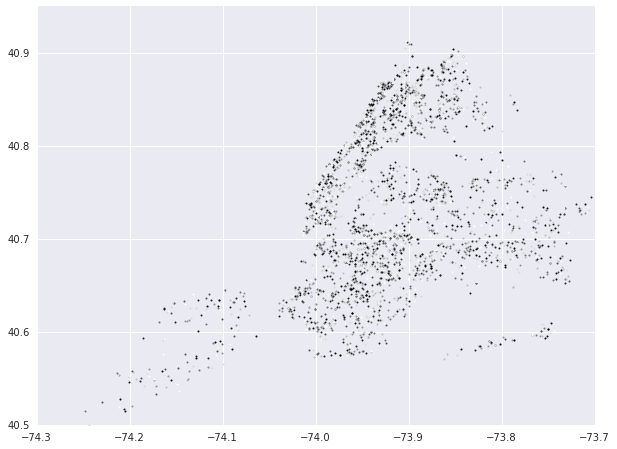

In [674]:
geocomplaints[:3000].plot();

We can also plot the categorical values as well

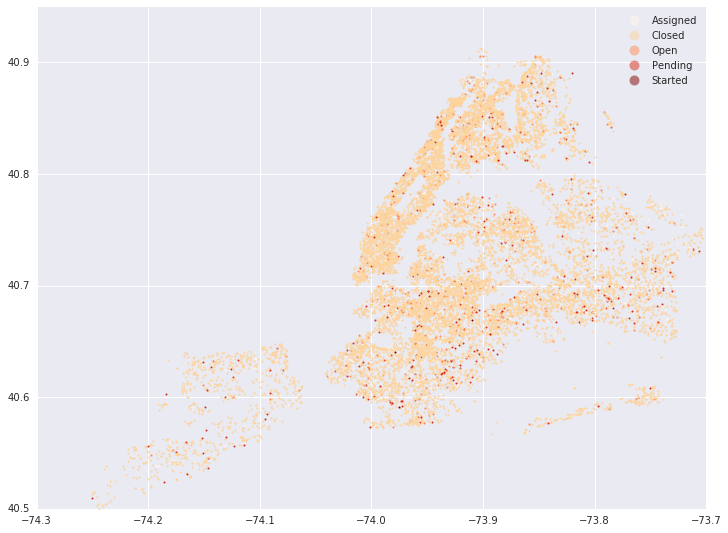

In [694]:
geocomplaints.plot('Status', cmap='OrRd', figsize=(12,10), categorical=True, legend=True);

## Mapping With Layers

A bunch of points mapped is not very informative, since it lacks context.  Let's add the points to the block base to add visual context.

NOTE: the maps are going to be pretty slow.  Especially when we get to more detailed maps.  Note the circle in the upper right of the Jupyter notebook that goes solid while Python is running. Just wait for it to go white again, and you'll see maps appear.

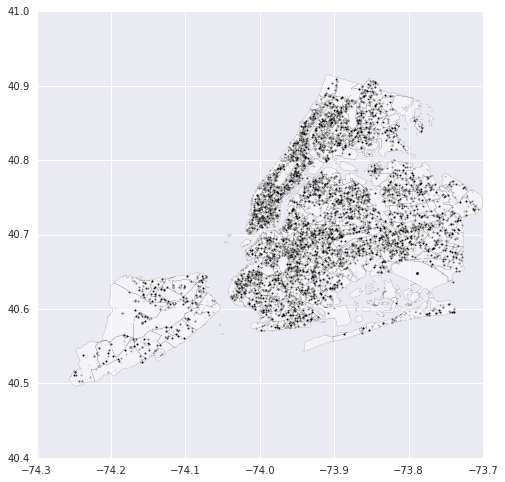

In [21]:
base = census_blocks.plot(color='white', linewidth=.1)
geocomplaints.plot(ax=base);

## Merging data

There are two ways to combine datasets in geopandas – **attribute joins** and **spatial joins**.

In an attribute join, a **GeoSeries** or **GeoDataFrame** is combined with a regular pandas Series or DataFrame based on a common variable. This is analogous to normal merging or joining in pandas.

In a **Spatial Join**, observations from to **GeoSeries** or **GeoDataFrames** are combined based on their spatial relationship to one another.



### Types of spatial joins
We currently support the following methods of spatial joins. We refer to the left_df and right_df which are the correspond to the two dataframes passed in as arguments.

#### Left outer join
In a LEFT OUTER JOIN (how='left'), we keep all rows from the left and duplicate them if necessary to represent multiple hits between the two dataframes. We retain attributes of the right if they intersect and lose right rows that don't intersect. A left outer join implies that we are interested in retaining the geometries of the left.

In [324]:
join_left_df = gpd.sjoin(geocomplaints, census_blocks, how="left")

In [325]:
join_left_df.head()

,Unnamed: 0,Created Date,Closed Date,Agency Name,Complaint Type,Status,Street Name,Location Type,Borough,Latitude,...,Total Po_3,Total Popu,boro_code,boro_name,county_fip,ntacode,ntaname,poly_id,shape_area,shape_leng
0,1235309,08/25/2015 10:35:59 AM,NaN,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Open,EAST 24 STREET,Street,BROOKLYN,40.615938,...,-4.7,55440.0,3,Brooklyn,047,BK43,Midwood,49,35799574.1576,27996.5906141
1,1141518,08/19/2015 12:59:52 PM,NaN,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Open,ELY AVENUE,Street,BRONX,40.893565,...,-2.5,43583.0,2,Bronx,005,BX62,Woodlawn-Wakefield,94,39738769.4393,38694.0395431
2,1504180,08/20/2015 02:34:00 PM,08/21/2015 12:00:00 PM,A - Brooklyn,Dirty Conditions,Closed,EAST 93 STREET,Sidewalk,BROOKLYN,40.640863,...,-1.6,85058.0,3,Brooklyn,047,BK50,Canarsie,164,82031581.9232,43694.0161172
3,98387,08/25/2015 02:01:18 PM,02/11/2016 12:00:00 AM,Department of Buildings,General Construction/Plumbing,Closed,79 AVENUE,NaN,QUEENS,40.694845,...,4.6,31071.0,4,Queens,081,QN19,Glendale,141,30016735.6997,41514.4352106
4,182630,08/11/2015 12:44:35 PM,08/11/2015 02:25:27 PM,New York City Police Department,Derelict Vehicle,Closed,MEMPHIS AVENUE,Street/Sidewalk,STATEN ISLAND,40.548168,...,5.3,26376.0,5,Staten Island,085,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,162,140982198.315,71224.4119337


#### Right outer join
In a RIGHT OUTER JOIN (how='right'), we keep all rows from the right and duplicate them if necessary to represent multiple hits between the two dataframes. We retain attributes of the left if they intersect and lose left rows that don't intersect. A right outer join implies that we are interested in retaining the geometries of the right.



In [675]:
join_right_df = gpd.sjoin(geocomplaints, census_blocks, how="right", op='within')

In [676]:
join_right_df.head()

,Unnamed: 0,Created Date,Closed Date,Agency Name,Complaint Type,Status,Street Name,Location Type,Borough_x,Latitude,...,boro_name,county_fips,geometry,ntacode,ntaname,shape_area,shape_leng,complaints_count,complaints_normalized,cl
index_right,,,,,,,,,,,,,,,,,,,,,
0.0,1804900.0,08/15/2015 09:52:00 PM,08/18/2015 09:39:00 AM,Department of Transportation,Street Light Condition,Closed,50 STREET,NaN,BROOKLYN,40.627739,...,Brooklyn,047,(POLYGON ((-73.97604935657381 40.6312759056467...,BK88,Borough Park,54005019.0709,39247.2280277,101,0.00095,2
0.0,1815563.0,08/21/2015 08:46:00 AM,08/22/2015 12:00:00 PM,BCC - Brooklyn South,Missed Collection (All Materials),Closed,61 STREET,Sidewalk,BROOKLYN,40.616987,...,Brooklyn,047,(POLYGON ((-73.97604935657381 40.6312759056467...,BK88,Borough Park,54005019.0709,39247.2280277,101,0.00095,2
0.0,1827003.0,08/28/2015 09:04:12 AM,04/13/2016 12:00:00 AM,Department of Buildings,Building/Use,Closed,54 STREET,NaN,BROOKLYN,40.623388,...,Brooklyn,047,(POLYGON ((-73.97604935657381 40.6312759056467...,BK88,Borough Park,54005019.0709,39247.2280277,101,0.00095,2
0.0,93413.0,08/23/2015 09:12:59 AM,08/23/2015 11:26:41 AM,New York City Police Department,Illegal Parking,Closed,54 STREET,Street/Sidewalk,BROOKLYN,40.623349,...,Brooklyn,047,(POLYGON ((-73.97604935657381 40.6312759056467...,BK88,Borough Park,54005019.0709,39247.2280277,101,0.00095,2
0.0,1786060.0,08/04/2015 06:32:00 PM,08/06/2015 12:00:00 PM,BCC - Brooklyn South,Missed Collection (All Materials),Closed,57 STREET,Sidewalk,BROOKLYN,40.620437,...,Brooklyn,047,(POLYGON ((-73.97604935657381 40.6312759056467...,BK88,Borough Park,54005019.0709,39247.2280277,101,0.00095,2


#### Inner join
In an INNER JOIN (how='inner'), we keep rows from the right and left only where their binary predicate is True. We duplicate them if necessary to represent multiple hits between the two dataframes. We retain attributes of the right and left only if they intersect and lose all rows that do not. An inner join implies that we are interested in retaining the geometries of the left.



In [111]:
join_inner_df = gpd.sjoin(geocomplaints, census_blocks, how="inner")

In [112]:
join_inner_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Total Population Change 2000-2010 Number,Total Population Change 2000-2010 Percent,boro_code,boro_name,county_fips,ntacode,ntaname,shape_area,shape_leng,poly_id
0,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,-563.0,-1.3,4,Queens,081,QN46,Bayside-Bayside Hills,80797535.8655,43014.8052937,10
1,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,2823.0,10.9,1,Manhattan,061,MN17,Midtown-Midtown South,30192056.8756,27035.7380616,14
2,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,-147.0,-0.3,2,Bronx,005,BX36,University Heights-Morris Heights,21252300.9774,24306.9572202,97
3,31000038,07/03/2015 02:18:32 AM,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,-5175.0,-4.6,4,Queens,081,QN28,Jackson Heights,47854806.1233,29422.681843,132
4,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,-293.0,-0.3,3,Brooklyn,047,BK61,Crown Heights North,51619074.7114,35635.5435521,66


#### All complaints

In [677]:
grouped = join_right_df.groupby('index',sort=True).size()

In [678]:
census_blocks['complaints_count'] = grouped.values# / census_blocks['Total Population 2010 Number']
census_blocks['complaints_normalized'] = grouped.values / census_blocks['Population_2010']

/home/eshirokova/.local/lib/python3.4/site-packages/geopandas/geodataframe.py:447: UserWarning: Unrecognized scheme "equals". Using "Quantiles" instead
  return plot_dataframe(self, *args, **kwargs)


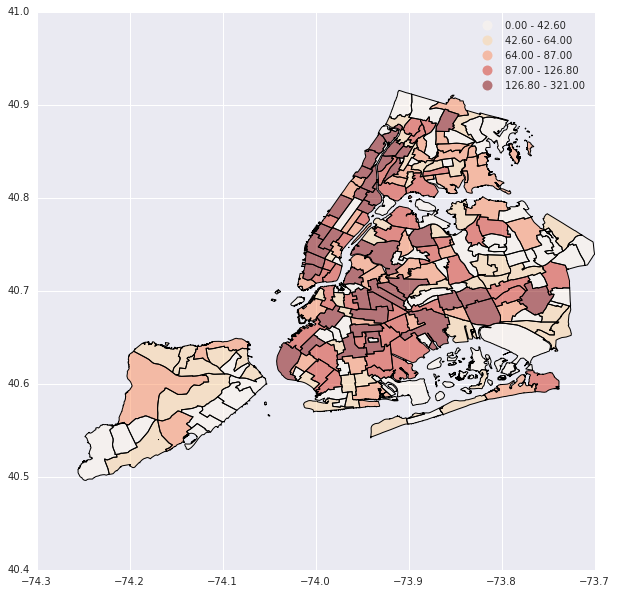

In [679]:
census_blocks.plot('complaints_count', cmap='OrRd', figsize=(12,10), scheme='equals',legend=True);

It is important to remember that the map is showing raw counts of complaints. As with many other phenomena that affect to only a portion of the population, it is crucial to keep in mind the underlying population. Although complaints could theoretically take place anywhere on the map, they really can only appear in areas where there are people who can call to 311 center. If population is not distributed equally (and most often it is not) and we ignore its spatial pattern, the map of raw counts will most likely simply display the overall pattern of the underlying population. In this example, if all we map is raw counts of complaints, we are showing a biased picture towards areas with high levels of population because, everything else equal, the more people the more potential for complaints to appear.

To obtain a more accurate picture, what we would like to see is a map of the intensity of complaints, not of raw counts. To do this, ideally we want to divide the number of complaints per polygon by the total number of potential population who could call at any given moment. This of course is not always available, so we have to resort to proxy variables. For the sake of this example, we will use the residential population. 

Plotting the number of calls per resident per neighborhood provides the following maps. Darker areas represent higher densities of complaints.

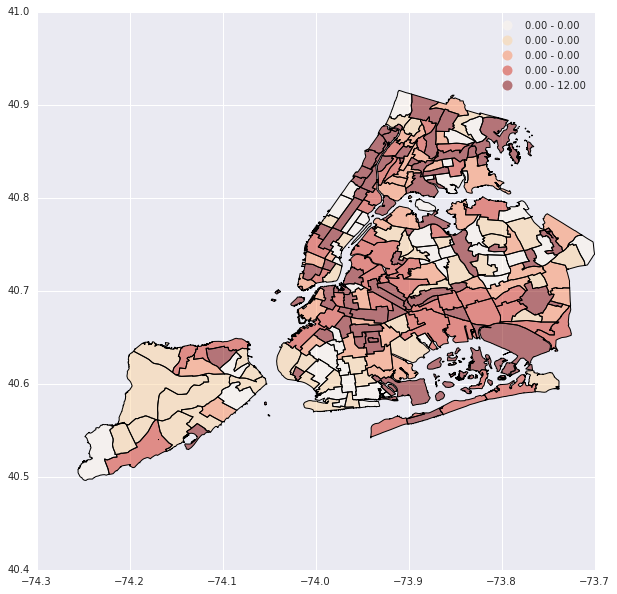

In [681]:
census_blocks.plot('complaints_normalized', cmap='OrRd', figsize=(12,10), scheme='quantiles',legend=True);

#### Complaints: Noise residential

In [683]:
join_right_df = gpd.sjoin(geocomplaints[geocomplaints['Complaint Type'].str.contains( 'Noise')], census_blocks, how="right", op='within')

In [685]:
grouped = join_right_df.groupby('index',sort=True).size()
census_blocks['complaints_count'] = grouped.values# / census_blocks['Total Population 2010 Number']
census_blocks['complaints_normalized'] = grouped.values / census_blocks['Population_2010']

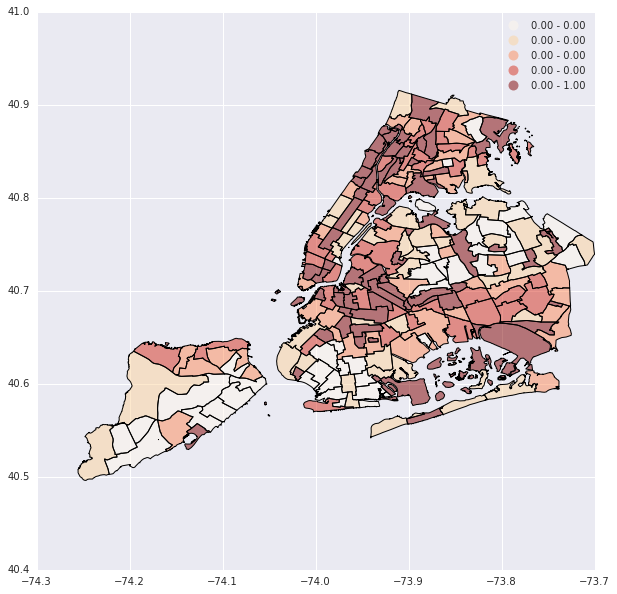

In [686]:
census_blocks.plot('complaints_normalized', cmap='OrRd', figsize=(12,10), scheme='quantiles', legend=True);

#### Graffiti

In [687]:
join_right_df = gpd.sjoin(geocomplaints[geocomplaints['Complaint Type'] == 'Graffiti'], census_blocks, how="right", op='within')

In [688]:
grouped = join_right_df.groupby('index',sort=True).size()
census_blocks['complaints_count'] = grouped.values# / census_blocks['Total Population 2010 Number']
census_blocks['complaints_normalized'] = grouped.values / census_blocks['Population_2010']

/home/eshirokova/.local/lib/python3.4/site-packages/geopandas/geodataframe.py:447: UserWarning: Unrecognized scheme "equals". Using "Quantiles" instead
  return plot_dataframe(self, *args, **kwargs)


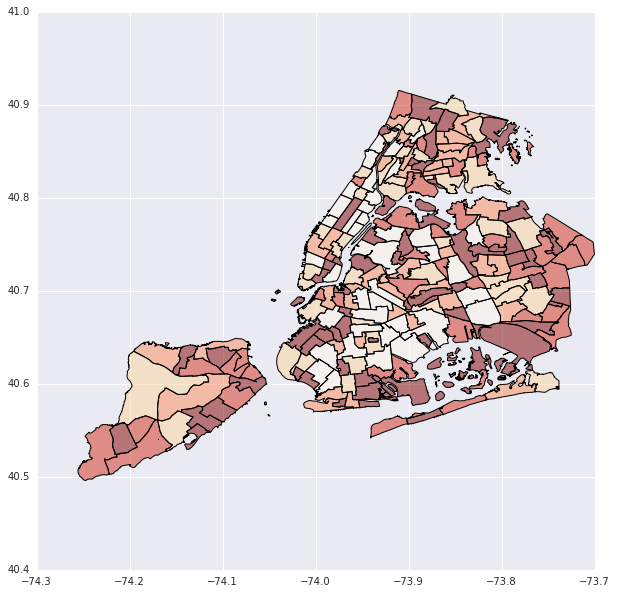

In [689]:
census_blocks.plot('complaints_normalized', cmap='OrRd', figsize=(12,10), scheme='equals');

The examples above show how various complaints spread over city - we may say that the Manhattan is one of the noisiest part of NYC. Graffiti complaints are more concentrated on the east

### Geometric Manipulations

In [117]:
from IPython.core.display import Image 
Image(url="http://docs.qgis.org/testing/en/_images/overlay_operations.png") 

Geopandas makes available all the tools for geometric manipulations in the *shapely* library.

In [363]:
nyc_boroughs = gpd.read_file('data_nyc.geojson')

In [364]:
circles = geocomplaints[:1000]['geometry'].buffer(0.005)

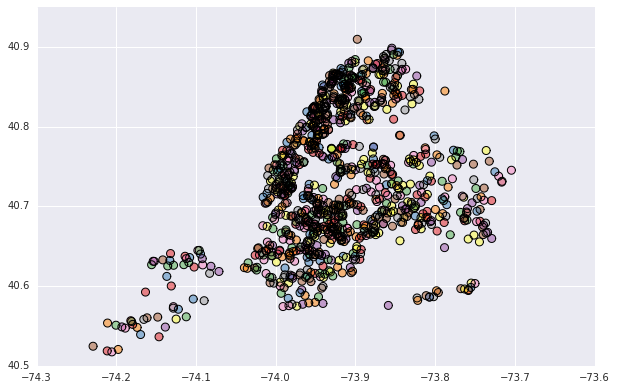

In [365]:
circles.plot()

We can collapse these circles into a single shapely MultiPolygon geometry with unary_union:

In [162]:
mp = circles.unary_union

In [163]:
holes = nyc_boroughs['geometry'].intersection(mp)

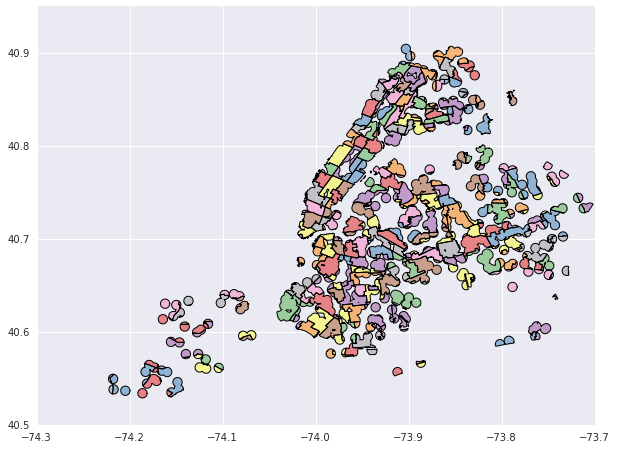

In [164]:
holes.plot();

and to get the area outside of the holes:

In [165]:
boros_with_holes = nyc_boroughs['geometry'].difference(mp)

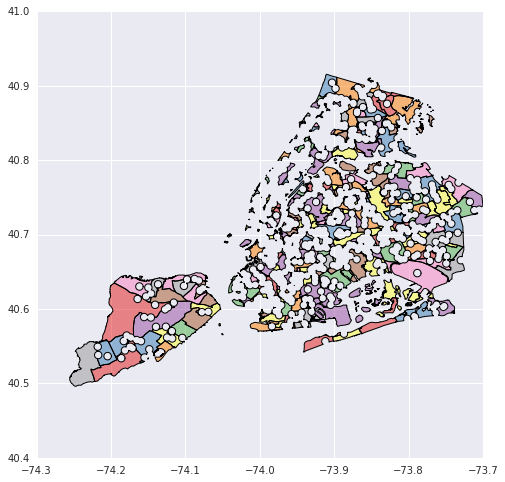

In [166]:
boros_with_holes.plot();

#### Heatmap: bonus

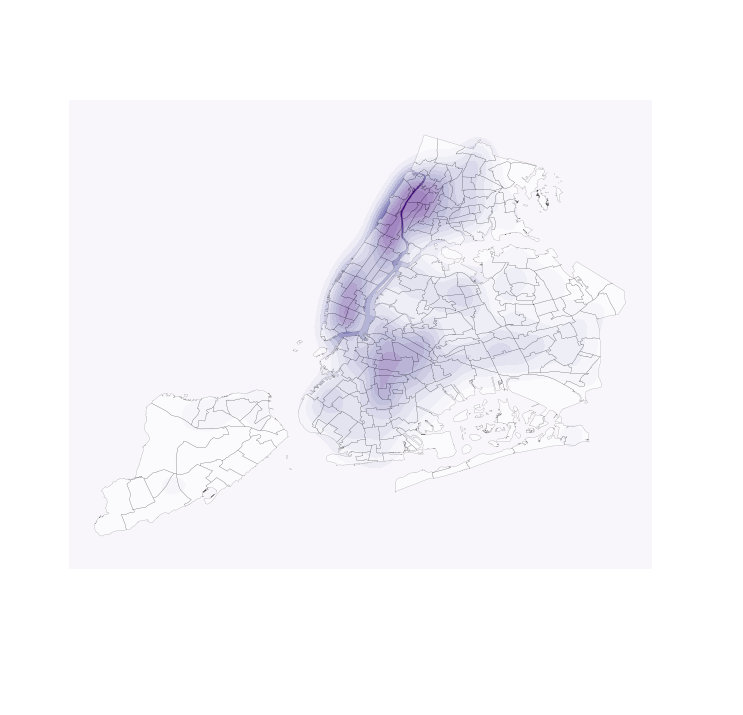

In [690]:
f, ax = plt.subplots(1, figsize=(12, 12))

census_blocks.plot(color='white', linewidth=0.1, ax=ax)

sns.kdeplot(geocomplaints['Longitude'], geocomplaints['Latitude'], \
            shade=True, cmap='Purples', \
            ax=ax);

ax.set_axis_off()
plt.axis('equal')
plt.show()

## Spatial clustering bonus

In [661]:
from sklearn import cluster
from sklearn.preprocessing import scale, normalize


In [662]:
km5 = cluster.KMeans(n_clusters=5)

In [665]:
km5cls = km5.fit(normalize(census_blocks[['complaints_count', 'Population_2010']].values))

### Mapping the categories
To get a better understanding of the classification we have just performed, it is useful to display the categories created on a map. For this, we will use a unique values choropleth, which will automatically assign a different color to each category:

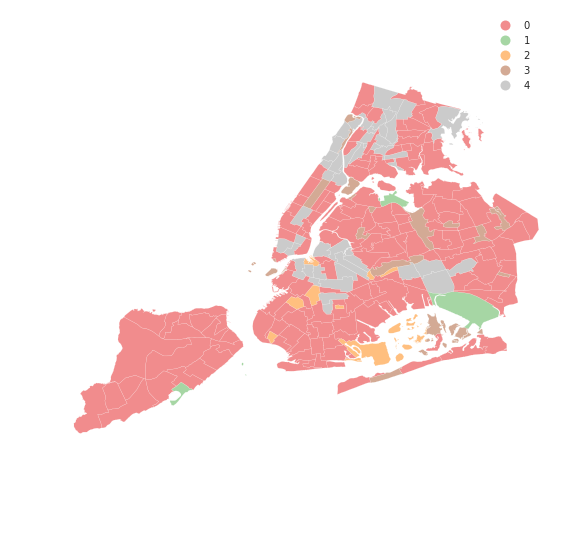

In [666]:
f, ax = plt.subplots(1, figsize=(9, 9))

census_blocks.assign(cl=km5cls.labels_)\
   .plot(column='cl', categorical=True, legend=True, \
         linewidth=0.1, edgecolor='white', ax=ax)

ax.set_axis_off()

plt.show()

In [559]:
census_blocks['complaints_count'].max()

912

In [563]:
census_blocks[['complaints_count', 'Population_2010', 'cl']][census_blocks.cl==0]

,complaints_count,Population_2010,cl
2,10,19996.0,0
4,109,23150.0,0
6,1,11091.0,0
7,104,20269.0,0
8,311,22950.0,0
13,24,17812.0,0
16,12,21751.0,0
23,80,20988.0,0
38,21,21896.0,0
44,62,18677.0,0


In [462]:
census_blocks = census_blocks.assign(cl=km5cls.labels_)

## Exercises

Create a point with (3,0) coordinates

Print point area and length

Go to site http://boundingbox.klokantech.com/ , choose boundong box for city you like and cmreate a polygon with its coordinates

Print exterior coordinates for polygon

Check if the point above lies in the polygon

Construct buffer of 10 around the point defined in the first exercise and get the area

So now you're familiar with Geopandas and Shapely, you can conduct your own geospatial research. For that purpose you are free to choose any data from [here](https://s3.amazonaws.com/tripdata/index.html) and do the following:

* Download data to your laptop and load it to Dataframe
* Clean data - Remove missing data where coordinates are absent
* Get basic information of dataset: number of rows/columns, mean/median values of interesting columns and etc.(Hint: * Look at notebooks from Lecture 2 or spreadsheets)
* Draw possible plots and distributions for these data(Hint: look at the notebook NYC citi bike data visualization.ipynb from Lecture 2)
* Create GeoDataFrame from cleaned data
* Load the polygons
* Apply spatial merge to data and polygons
* Plot thematic maps - for different columns, raw counts/normalized

